## Computer Vision & Image Processing: **Lab Activity 3**

*Submitted by:*

**Christian Elijah Darvin**

BCS32

College of Information and Computer Studies - De La Salle University Dasmariñas

In [83]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv

print(f"NumPy Version: {np.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"OpenCV Version: {cv.__version__}")

NumPy Version: 1.26.4
Matplotlib Version: 3.10.0
OpenCV Version: 4.11.0


### Task 1: Pixel Representation and Color Models (RGB & HSV)

In [84]:
def check_if_image_loaded(img):
    if img is not None:
        print("Image loaded successfully!")
    else:
        print("Failed to load image.")

In [85]:
rainbow_img = cv.imread("./images/rainbow.jpg")
check_if_image_loaded(rainbow_img)

Image loaded successfully!


In [86]:
# Image to RGB
rainbow_img_rgb = cv.cvtColor(rainbow_img, cv.COLOR_BGR2RGB)

# Image to HSV
rainbow_img_hsv = cv.cvtColor(rainbow_img, cv.COLOR_BGR2HSV)

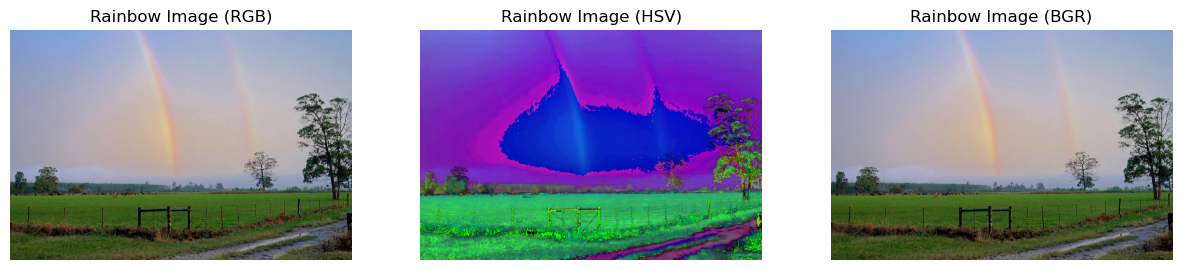

In [87]:
# Show RGB image
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(rainbow_img_rgb)
plt.title("Rainbow Image (RGB)")
plt.axis("off")

# Show HSV image
plt.subplot(1, 3, 2)
plt.imshow(rainbow_img_hsv)
plt.title("Rainbow Image (HSV)")
plt.axis("off")

# Show Original Image
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(rainbow_img, cv.COLOR_BGR2RGB))
plt.title("Rainbow Image (BGR)")
plt.axis("off")
plt.show()

### Task 2: Image Interpolation Methods

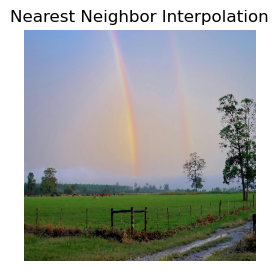

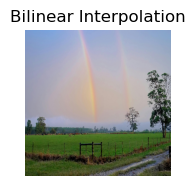

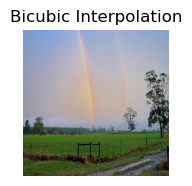

In [ ]:
methods = {
    "Nearest Neighbor": cv.INTER_NEAREST,
    "Bilinear": cv.INTER_LINEAR,
    "Bicubic": cv.INTER_CUBIC,
}

new_size = (400, 400)
plt.figure(figsize=(15, 3))

for idx, (method_name, method) in enumerate(methods.items(), start=1):
    resized_img = cv.resize(rainbow_img, new_size, interpolation=method)

    plt.subplot(1, 3, idx)
    plt.imshow(cv.cvtColor(resized_img, cv.COLOR_BGR2RGB))
    plt.title(f"{method_name} Interpolation")
    plt.axis("off")
    plt.show()

### Task 3: Geometric Transformations (Scaling, Rotation, Translation)

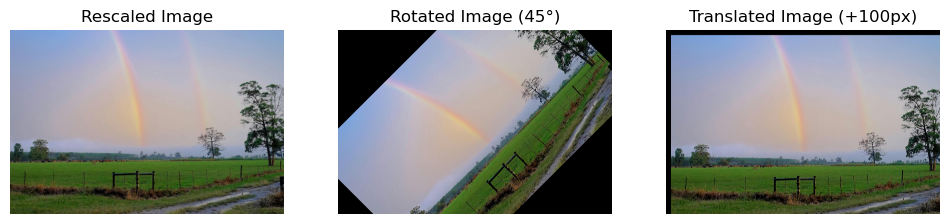

In [ ]:
scale_percent = 50
width = int(rainbow_img.shape[1] * scale_percent / 100)
height = int(rainbow_img.shape[0] * scale_percent / 100)
dim = (width, height)

rescaled_img = cv.resize(rainbow_img, dim)
center = (rainbow_img.shape[1] // 2, rainbow_img.shape[0] // 2)

rotation_matrix = cv.getRotationMatrix2D(center, 45, 1.0)  # Rotate by 45 degrees
rotated_image = cv.warpAffine(
    rainbow_img, rotation_matrix, (rainbow_img.shape[1], rainbow_img.shape[0])
)
# Translation: Move the rainbow_img 100 pixels in both x and y direction
translation_matrix = np.float32([[1, 0, 100], [0, 1, 100]])  # Translate by (100, 100)
translated_image = cv.warpAffine(
    rainbow_img, translation_matrix, (rainbow_img.shape[1], rainbow_img.shape[0])
)
# Plot the transformations
plt.figure(figsize=(12, 4))
# Display Rescaled rainbow_img
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(rescaled_img, cv.COLOR_BGR2RGB))
plt.title("Rescaled Image")
plt.axis("off")
# Display Rotated rainbow_img
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotated Image (45°)")
plt.axis("off")
# Display Translated rainbow_img
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(translated_image, cv.COLOR_BGR2RGB))
plt.title("Translated Image (+100px)")
plt.axis("off")
plt.show()

### Task 4: Combine Concepts

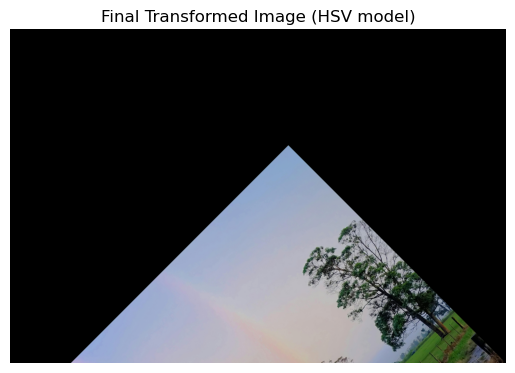

In [90]:
rainbow_img_hsv = cv.cvtColor(rainbow_img, cv.COLOR_BGR2HSV)

scaled_hsv = cv.resize(rainbow_img_hsv, dim, interpolation=cv.INTER_CUBIC)
# Rotate the scaled image
rotated_hsv = cv.warpAffine(
    scaled_hsv, rotation_matrix, (scaled_hsv.shape[1], scaled_hsv.shape[0])
)
# Translate the rotated image
translated_hsv = cv.warpAffine(
    rotated_hsv, translation_matrix, (rotated_hsv.shape[1], rotated_hsv.shape[0])
)
# Plot the final image
plt.imshow(cv.cvtColor(translated_hsv, cv.COLOR_HSV2RGB))
plt.title("Final Transformed Image (HSV model)")
plt.axis("off")
plt.show()

### Answer the following questions:
1. **The image is conversion to the HSV color model.**
   

   The color channels were converted from **BGR (Blue, Green, Red)** to **HSV (Hue, Saturation, Value)**. The conversion from an RGB image to HSV is done using the function: ``cv.cvtColor(img, cv.COLOR_BGR2HSV``). **Hue (H)**: Represents the color type (e.g., red, blue, green), ranging from 0 to 179 in OpenCV. **Saturation (S)**: Indicates color intensity, ranging from 0 (gray) to 255 (pure color). **Value (V)**: Represents brightness, where 0 is black and 255 is the brightest. 

2. **Bicubic interpolation in applying for resizing.**
   
   Bicubic interpolation is a method used in image processing to resize images while maintaining smooth transitions and minimizing artifacts. It is an improvement over bilinear interpolation and is particularly useful when upscaling images. I noticed that when using bicubic interpolation, the image appeared more compact without being cropped.

3. **The image is rotated and translated using the same geometric transformations.**
   
   The image undergoes a series of geometric transformations, including resizing, rotation, and translation. First, it is resized using bicubic interpolation to adjust its dimensions while preserving details. Then, the ``cv.warpAffine ``function applies a rotation matrix, tilting the image at a specified angle. After rotation, another affine transformation is used to translate the image, shifting it along the x and y axes. As a result, the final image appears repositioned within the frame, with noticeable black areas caused by empty pixel regions created during the transformations. These transformations are applied sequentially, ensuring that the translation occurs after the rotation repositioning the rotated image.